In [1]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
test_dir = r"D:\EmotionImageClassificationProject\archive (1)\ImageFolder\test"

In [5]:
train_dir = r"D:\EmotionImageClassificationProject\archive (1)\ImageFolder\train"

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=20,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 28709 images belonging to 7 classes.


In [11]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48,48),
    batch_size=30,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 7178 images belonging to 7 classes.


In [7]:
import os
from PIL import Image

folder = r"D:\EmotionImageClassificationProject\archive (1)\ImageFolder\train"
num_corrupted = 0

for category in os.listdir(folder):
    path = os.path.join(folder, category)
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        try:
            img = Image.open(img_path)
            img.verify()  # check if corrupted
        except (IOError, SyntaxError):
            print(f'Removing corrupted image: {img_path}')
            os.remove(img_path)
            num_corrupted += 1

print(f'Total corrupted images removed: {num_corrupted}')


Total corrupted images removed: 0


In [13]:
from tensorflow.keras import Input

model = Sequential([
    Input(shape=(48, 48, 1)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])


In [15]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)


In [17]:
import warnings
warnings.filterwarnings('ignore')


In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=8,              # stop if no improvement for 8 epochs
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,              # reduce LR if stuck
    min_lr=1e-6
)

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=50,              # try up to 100 epochs
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 445s 475ms/step - accuracy: 0.2517 - loss: 1.8090 - val_accuracy: 0.3589 - val_loss: 1.6269 - learning_rate: 0.0010
Epoch 2/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 147s 164ms/step - accuracy: 0.3392 - loss: 1.6708 - val_accuracy: 0.4419 - val_loss: 1.4547 - learning_rate: 0.0010
Epoch 3/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 146s 162ms/step - accuracy: 0.3993 - loss: 1.5454 - val_accuracy: 0.4675 - val_loss: 1.3704 - learning_rate: 0.0010
Epoch 4/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 151s 168ms/step - accuracy: 0.4313 - loss: 1.4768 - val_accuracy: 0.4996 - val_loss: 1.3199 - learning_rate: 0.0010
Epoch 5/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 161s 179ms/step - accuracy: 0.4510 - loss: 1.4256 - val_accuracy: 0.5131 - val_loss: 1.2816 - learning_rate: 0.0010
Epoch 6/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 157s 174ms/step - accuracy: 0.4740 - loss: 1.3841 - val_accuracy: 0.5187 - val_loss: 1.2809 - learning_rate: 0.0010
Epoch 7/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 149s 166ms/step - accura

In [12]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20,              
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 149s 165ms/step - accuracy: 0.5657 - loss: 1.1458 - val_accuracy: 0.5886 - val_loss: 1.0852 - learning_rate: 4.0000e-05
Epoch 2/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 151s 168ms/step - accuracy: 0.5669 - loss: 1.1529 - val_accuracy: 0.5871 - val_loss: 1.0845 - learning_rate: 4.0000e-05
Epoch 3/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 149s 165ms/step - accuracy: 0.5744 - loss: 1.1415 - val_accuracy: 0.5886 - val_loss: 1.0847 - learning_rate: 4.0000e-05
Epoch 4/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 151s 168ms/step - accuracy: 0.5651 - loss: 1.1449 - val_accuracy: 0.5869 - val_loss: 1.0873 - learning_rate: 4.0000e-05
Epoch 5/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 151s 167ms/step - accuracy: 0.5731 - loss: 1.1361 - val_accuracy: 0.5885 - val_loss: 1.0835 - learning_rate: 4.0000e-05
Epoch 6/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 148s 165ms/step - accuracy: 0.5745 - loss: 1.1297 - val_accuracy: 0.5886 - val_loss: 1.0825 - learning_rate: 4.0000e-05
Epoch 7/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 

In [38]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [40]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),      # Resize from 48x48 → 224x224
    color_mode='rgb',            # Convert grayscale → RGB
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical'
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [42]:
# Load base model
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

# Fine-tune last 40 layers
base_model.trainable = True
for layer in base_model.layers[:-40]:
    layer.trainable = False

# Build model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')  # 7 emotion classes
])


In [46]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [48]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)


In [50]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20,
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 3485s 4s/step - accuracy: 0.3194 - loss: 1.7335 - val_accuracy: 0.4019 - val_loss: 1.7612 - learning_rate: 1.0000e-04
Epoch 2/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 971s 1s/step - accuracy: 0.4843 - loss: 1.3671 - val_accuracy: 0.4120 - val_loss: 2.1043 - learning_rate: 1.0000e-04
Epoch 3/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 1632s 2s/step - accuracy: 0.5191 - loss: 1.2866 - val_accuracy: 0.4769 - val_loss: 1.5163 - learning_rate: 1.0000e-04
Epoch 4/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 1153s 1s/step - accuracy: 0.5517 - loss: 1.2011 - val_accuracy: 0.5490 - val_loss: 1.2295 - learning_rate: 1.0000e-04
Epoch 5/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 1596s 2s/step - accuracy: 0.5585 - loss: 1.1752 - val_accuracy: 0.5736 - val_loss: 1.1612 - learning_rate: 1.0000e-04
Epoch 6/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 1628s 2s/step - accuracy: 0.5828 - loss: 1.1322 - val_accuracy: 0.5607 - val_loss: 1.1792 - learning_rate: 1.0000e-04
Epoch 7/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 3032s 3s/step

In [52]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"✅ Test Accuracy: {test_acc:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")


225/225 ━━━━━━━━━━━━━━━━━━━━ 413s 2s/step - accuracy: 0.6429 - loss: 0.9846
✅ Test Accuracy: 0.6393
✅ Test Loss: 0.9858


In [56]:
model.save("emotion_classifier_final.keras")
print("Model saved successfully in .keras format 🚀")


Model saved successfully in .keras format 🚀


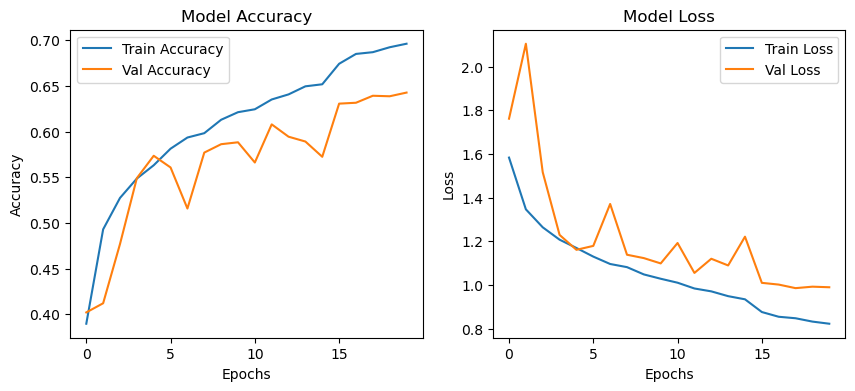

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

# Accuracy curve
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss curve
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



In [60]:
from tensorflow.keras.models import load_model

model = load_model("emotion_classifier_final.keras")
print("✅ Model loaded successfully!")


✅ Model loaded successfully!


In [62]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"✅ Test Accuracy: {test_acc:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")


225/225 ━━━━━━━━━━━━━━━━━━━━ 391s 2s/step - accuracy: 0.6385 - loss: 1.0076
✅ Test Accuracy: 0.6393
✅ Test Loss: 0.9858


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


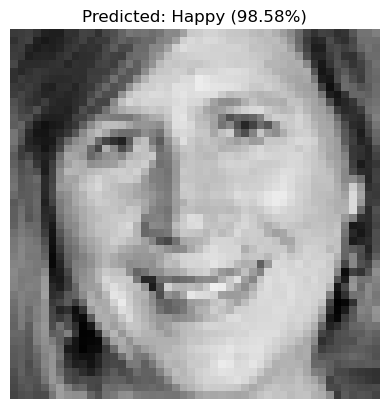

In [64]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# 🔹 Replace this with your own image path
img_path = r"D:\EmotionImageClassificationProject\archive (1)\ImageFolder\test\happy\PrivateTest_2028370.jpg"

# Load & preprocess image
img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Predict emotion
pred = model.predict(img_array)

# Emotion labels (change if your dataset uses different names)
classes = ['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']

predicted_label = classes[np.argmax(pred)]
confidence = np.max(pred)

# Display result
plt.imshow(image.load_img(img_path))
plt.axis("off")
plt.title(f"Predicted: {predicted_label} ({confidence*100:.2f}%)")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


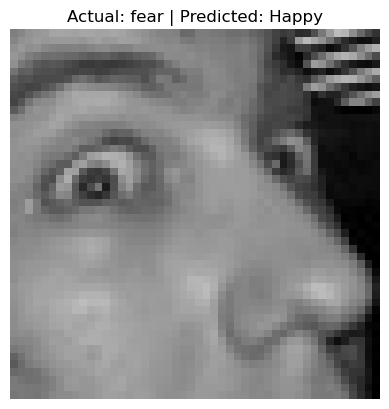

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


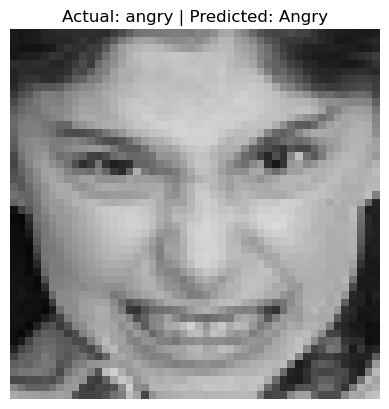

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


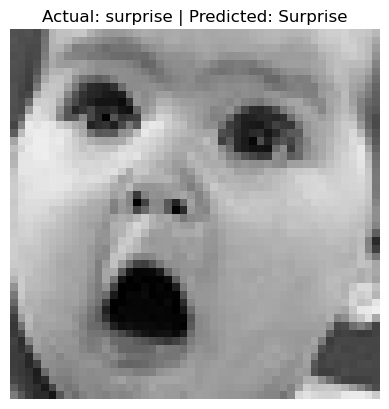

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


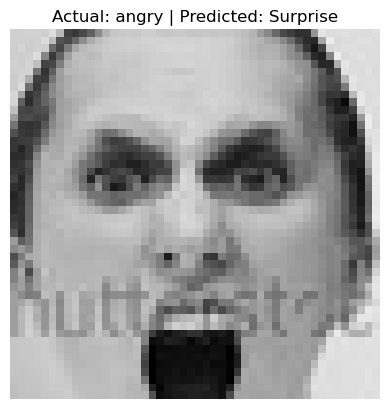

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


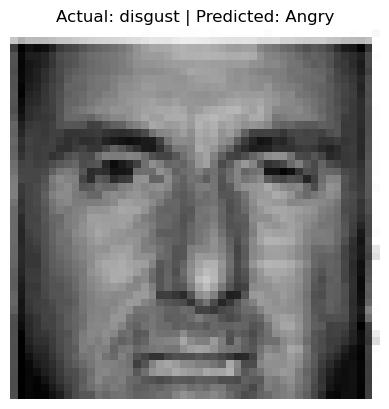

In [66]:
import random, os

test_folder = r"D:\EmotionImageClassificationProject\archive (1)\ImageFolder\test"
class_names = os.listdir(test_folder)

for _ in range(5):
    random_class = random.choice(class_names)
    img_name = random.choice(os.listdir(os.path.join(test_folder, random_class)))
    img_path = os.path.join(test_folder, random_class, img_name)

    img = image.load_img(img_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    pred = model.predict(img_array)
    predicted_label = classes[np.argmax(pred)]

    plt.imshow(image.load_img(img_path))
    plt.title(f"Actual: {random_class} | Predicted: {predicted_label}")
    plt.axis("off")
    plt.show()
